### Today:
* Supervised Learning
* Linear Regression
    * Model
    * Cost Function
    * Optimization
        * Gradient Descent
        * Feature Scaling
* Polynomial Regression
    * Model
    * Overfitting and Underfitting
    * Regularization

### Resources:
* Supervised Learning: https://mcerovic.github.io/notes/SupervisedLearning/index.html
* Linear Regression: https://mcerovic.github.io/notes/LinearRegression/index.html
* Gradient Descent: https://mcerovic.github.io/notes/GradientDescent/index.html
* Feature Scaling: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization

# Linear regression

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load dataset as numpy array
y, x = np.loadtxt('../../data/02_LinearRegression/house_price.csv', delimiter=',', unpack=True)
n_samples = len(x)

In [5]:
# Normalize data
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

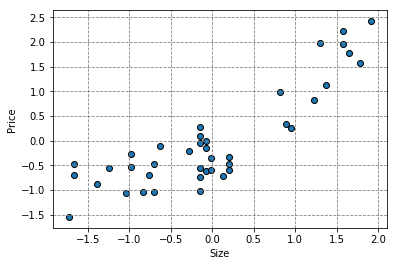

In [6]:
# Graphical preview
fig, ax = plt.subplots()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.scatter(x, y, edgecolors='k', label='Real house price')
ax.grid(True, color='gray', linestyle='dashed')

## Model

In [7]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [8]:
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [9]:
Y_predicted = tf.add(tf.multiply(X, w), b) 

## Cost function

In [11]:
cost = tf.reduce_mean(tf.square(Y - Y_predicted), name='cost')

## Optimization

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

## Train

In [13]:
with tf.Session() as sess:
    
    # Initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    # writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

    # Train the model in 50 epochs
    for i in range(50):
        
        total_cost = 0
        
        # Session runs train_op and fetch values of loss
        for sample in range(n_samples):
            
            # Session looks at all trainable variables that loss depends on and update them
            _, l = sess.run([optimizer, cost], feed_dict={X: x[sample], Y:y[sample]}) 
            
            total_cost += l
        
        # Print epoch and loss
        print('Epoch {0}: {1}'.format(i, total_cost / n_samples))
 
    # Close the writer when you're done using it
    # writer.close() 
    
    # Output the values of w and b
    w, b = sess.run([w, b]) 
    print('W: %f, b: %f' % (w, b))
    print('Cost: %f' % sess.run(cost, feed_dict={X: x, Y: y}))

Epoch 0: 0.9493254337137387
Epoch 1: 0.8467418120155343
Epoch 2: 0.7593818654942879
Epoch 3: 0.6849871750717285
Epoch 4: 0.6216341430710599
Epoch 5: 0.567684725373556
Epoch 6: 0.5217437629502356
Epoch 7: 0.4826229100071032
Epoch 8: 0.4493101443895989
Epoch 9: 0.4209438291443803
Epoch 10: 0.39678982907425964
Epoch 11: 0.3762229884319822
Epoch 12: 0.3587109926957652
Epoch 13: 0.34380037332884966
Epoch 14: 0.3311051445431076
Epoch 15: 0.3202964202471776
Epoch 16: 0.3110940179391946
Epoch 17: 0.30325955810039884
Epoch 18: 0.2965897890792803
Epoch 19: 0.29091190604297024
Epoch 20: 0.28607861342570684
Epoch 21: 0.2819644258896005
Epoch 22: 0.27846248714267857
Epoch 23: 0.27548188228302023
Epoch 24: 0.27294518834896736
Epoch 25: 0.2707863362119724
Epoch 26: 0.26894923349484545
Epoch 27: 0.2673859913416351
Epoch 28: 0.2660558756721912
Epoch 29: 0.26492427692514864
Epoch 30: 0.26396160841804883
Epoch 31: 0.2631427668080505
Epoch 32: 0.2624463188782101
Epoch 33: 0.2618540332838165
Epoch 34: 0.26

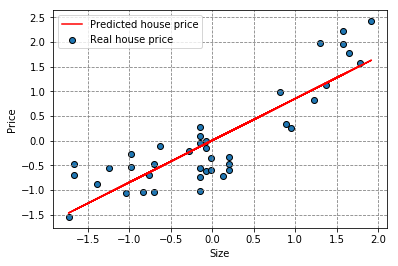

In [14]:
# Append hypothesis that we found on the plot
ax.plot(x, x * w + b, color='r', label='Predicted house price')
ax.legend()
fig

In [15]:
# Predict at point 0.5
print(0.5 * w + b)

0.42653536424040794
